In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from pathlib import Path
from P03_run_diff_sigma.T00_lib.utils import check_jupyter


In [53]:
if check_jupyter():
    BASE_DIR = Path.cwd()  # Current directory of the running file
    DATA_DIR = BASE_DIR.parent / "T02_combine_features"
    CURRENT_DIR = BASE_DIR
else:
    BASE_DIR = Path.cwd()  # Base directory of the project
    DATA_DIR = BASE_DIR / "src/P03_run_diff_sigma/T02_combine_features"
    CURRENT_DIR = Path(__file__).resolve().parent

Code is running in a Jupyter environment.


In [54]:
df = pd.read_excel(CURRENT_DIR / "S03_calculate_performance.xlsx")

In [55]:
df

,random_state,test_size,model,Y,MSE Train (No Val),MSE Test,MAPE Train (No Val),MAPE Test,R2 Train (No Val),R2 Test
0,1,0.3,ElasticNet,Y-1,0.696077,1.019408,1.798993,1.501360,0.303923,0.202552
1,1,0.3,ElasticNet,Y-2,0.872607,0.824408,1.192066,2.744234,0.127393,-0.005345
2,1,0.3,ElasticNet,Y-3,0.607797,0.639110,1.377645,1.271590,0.392203,0.250743
3,1,0.3,ElasticNet,Y-All,0.725494,0.827642,1.456235,1.839062,0.274506,0.149317
4,2,0.3,ElasticNet,Y-1,0.719539,0.764294,1.632073,1.689236,0.280461,0.124031
...,...,...,...,...,...,...,...,...,...,...
115,4,0.3,XGBR,Y-All,0.595380,0.761185,1.256043,1.648328,0.404620,0.239999
116,5,0.3,XGBR,Y-1,0.581384,1.027481,24.888351,1.436175,0.418616,0.118948
117,5,0.3,XGBR,Y-2,0.829275,0.804152,1.217824,1.910324,0.170725,-0.050331
118,5,0.3,XGBR,Y-3,0.533943,0.593823,1.232612,1.079642,0.466057,0.375226


In [56]:
filt = df["Y"] != "Y-All"
df_filt = df[filt]


<Axes: xlabel='model', ylabel='R2 Test'>

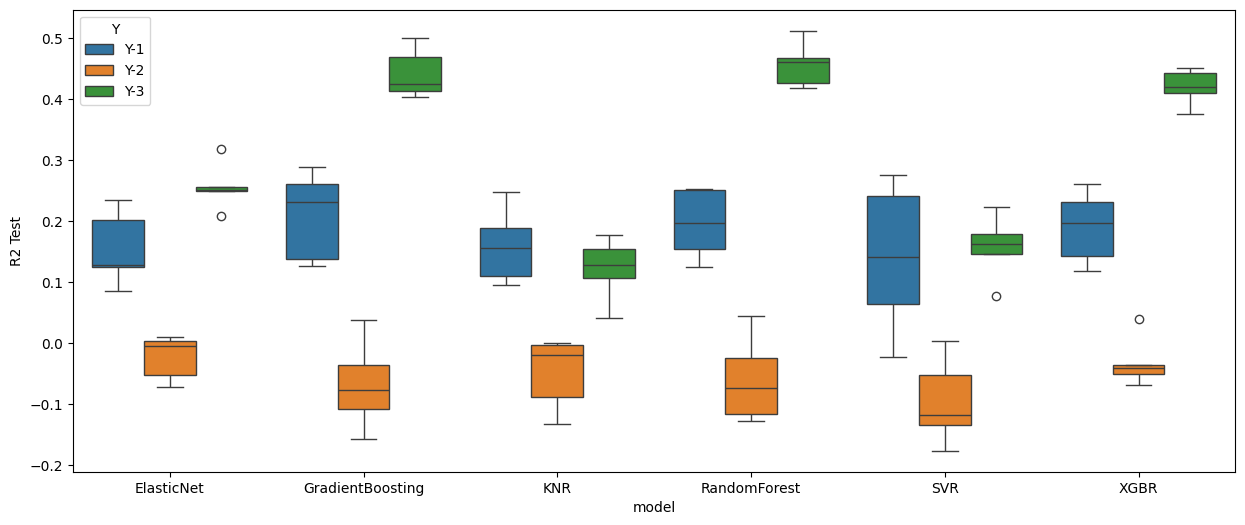

In [57]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.boxplot(df_filt, x="model", y="R2 Test", hue="Y", ax=ax)